In [30]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [19]:
df = pd.read_csv("/content/drive/MyDrive/TSLA.csv", encoding='cp949')

print('Number of rows and columns:', df.shape)
# df.head(5)
df.tail()

Number of rows and columns: (252, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
247,2023-02-01,173.889999,183.809998,169.929993,181.410004,181.410004,213806300
248,2023-02-02,187.330002,196.750000,182.610001,188.270004,188.270004,217448300
249,2023-02-03,183.949997,199.000000,183.690002,189.979996,189.979996,231684200
250,2023-02-06,193.009995,198.169998,189.919998,194.759995,194.759995,186188100
251,2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,185601700


In [22]:
high_prices = df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [23]:
# 최근 50일 간의 데이터 확인
seq_len = 50 # window size
sequence_length = seq_len + 1 

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [24]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0]*0.9)) 
train = result[:row, :]
np.random.shuffle(train) # training set shuffle

x_train = train[:, :-1] 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1] # 앞에 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 뒤에 1개

x_train.shape, x_test.shape

((181, 50, 1), (20, 50, 1))

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear')) # 다음날 하루의 데이터를 예측함
model.compile(loss='mse', optimizer='rmsprop') # Loss function
model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         batch_size=10, # 10개씩 묶어서 학습시킨다.
         epochs=20) # 20번동안 반복

Epoch 1/20
19/19 [==============================] - 6s 118ms/step - loss: 0.0242 - val_loss: 0.0302
Epoch 2/20
19/19 [==============================] - 2s 95ms/step - loss: 0.0085 - val_loss: 0.0447
Epoch 3/20
19/19 [==============================] - 2s 93ms/step - loss: 0.0063 - val_loss: 0.0081
Epoch 4/20
19/19 [==============================] - 2s 94ms/step - loss: 0.0054 - val_loss: 0.0146
Epoch 5/20
19/19 [==============================] - 3s 147ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 6/20
19/19 [==============================] - 2s 91ms/step - loss: 0.0041 - val_loss: 0.0177
Epoch 7/20
19/19 [==============================] - 2s 92ms/step - loss: 0.0042 - val_loss: 0.0125
Epoch 8/20
19/19 [==============================] - 1s 51ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 9/20
19/19 [==============================] - 1s 51ms/step - loss: 0.0032 - val_loss: 0.0149
Epoch 10/20
19/19 [==============================] - 1s 51ms/step - loss: 0.0036 - val_loss: 0.0186
Epoch 1

1/1 [==============================] - 2s 2s/step


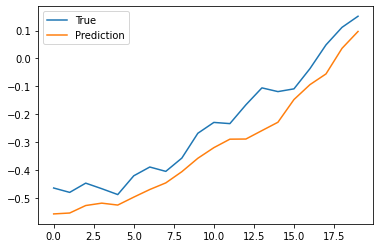

In [35]:
pred = model.predict(x_test) # 테스트 데이터 예측

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()
